<a href="https://colab.research.google.com/github/Nilayatabek/-devler/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Avrupa Yakası TSP Sonucu ===

Başlangıç düğümü : IST_Avrupa_Deposu
Tur tipi         : Açık tur (başa dönüş yok)
En iyi yol       : IST_Avrupa_Deposu -> Bakirkoy -> Sisli -> Besiktas
Toplam süre      : 62 dakika


=== Anadolu Yakası TSP Sonucu ===

Başlangıç düğümü : IST_Anadolu_Deposu
Tur tipi         : Açık tur (başa dönüş yok)
En iyi yol       : IST_Anadolu_Deposu -> Kadikoy -> Uskudar -> Atasehir
Toplam süre      : 47 dakika



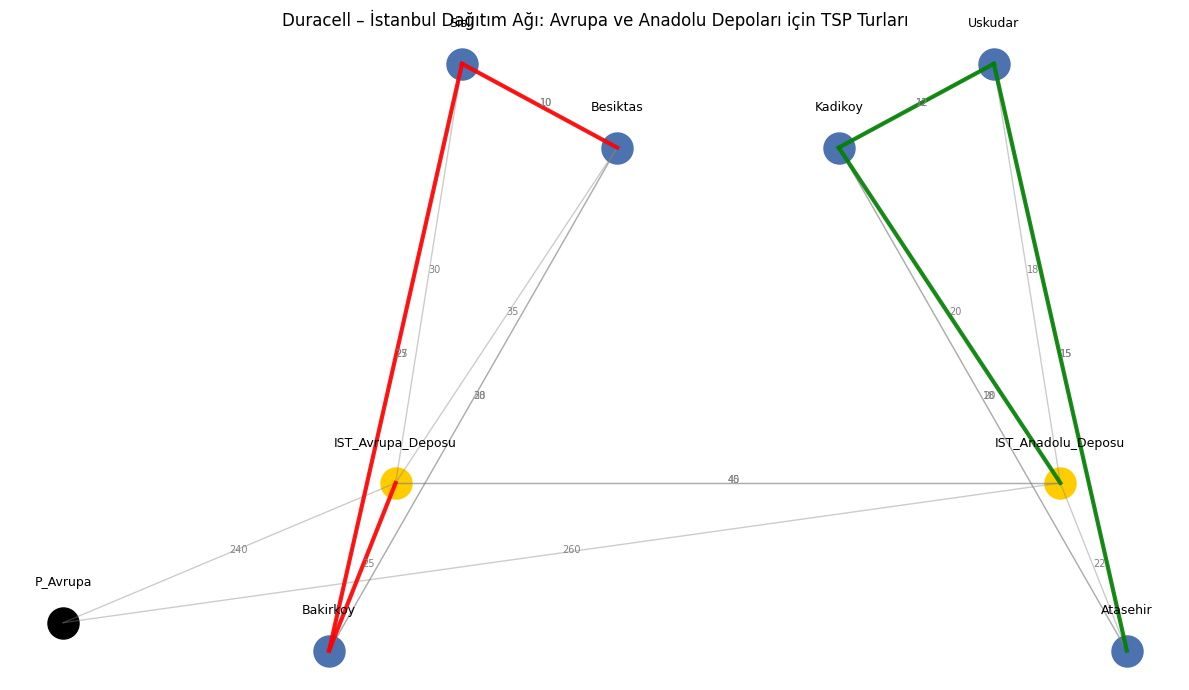

In [2]:
"""
Duracell – TSP Modeli (İki Depo, İki Ayrı Tur)
Avrupa Deposu → İstanbul Avrupa Yakası
Anadolu Deposu → İstanbul Anadolu Yakası

Bu dosya:
- Hiçbir ek kütüphane gerektirmez (networkx yok, pip install yok).
- Küçük bir ağ için brute-force TSP çözer (tüm permütasyonlar).
- Avrupa ve Anadolu yakası için iki ayrı TSP turu hesaplar.
- Ağı matplotlib ile çizer:
  - Avrupa turu kırmızı
  - Anadolu turu yeşil
"""

import itertools
import matplotlib.pyplot as plt

# ================================================================
# 1. Grafik (Ağ) Tanımı
# ================================================================
def kur_ag():
    """
    Grafı Python dictionary olarak kurar.
    Her düğüm → {komşu: süre} şeklinde tutulur.
    Süreler dk cinsinden, tamamen temsilidir.
    """
    G = {
        "P_Avrupa": {
            "IST_Avrupa_Deposu": 240,
            "IST_Anadolu_Deposu": 260,
        },
        "IST_Avrupa_Deposu": {
            "Besiktas": 35,
            "Sisli": 30,
            "Bakirkoy": 25,
            "IST_Anadolu_Deposu": 40,
        },
        "IST_Anadolu_Deposu": {
            "Kadikoy": 20,
            "Uskudar": 18,
            "Atasehir": 22,
            "IST_Avrupa_Deposu": 45,
        },
        # Avrupa yakası ilçeleri
        "Besiktas": {
            "Sisli": 10,
            "Bakirkoy": 28,
        },
        "Sisli": {
            "Besiktas": 10,
            "Bakirkoy": 25,
        },
        "Bakirkoy": {
            "Besiktas": 30,
            "Sisli": 27,
        },
        # Anadolu yakası ilçeleri
        "Kadikoy": {
            "Uskudar": 12,
            "Atasehir": 20,
        },
        "Uskudar": {
            "Kadikoy": 12,
            "Atasehir": 15,
        },
        "Atasehir": {
            "Kadikoy": 18,
            "Uskudar": 15,
        },
    }
    return G

# ================================================================
# 2. TSP Hesabı (Brute-force, Bölgesel)
# ================================================================
def path_cost(G, path):
    """
    Verilen path'in toplam maliyetini (süre) hesaplar.
    Eğer arada olmayan bir ark varsa, path geçersiz sayılır ve None döner.
    """
    total = 0
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i + 1]
        if u not in G or v not in G[u]:
            return None
        total += G[u][v]
    return total


def tsp_bruteforce_region(G, start, nodes_in_region, return_to_start=False):
    """
    Sadece verilen bölgedeki düğümler üzerinde TSP çözümü.

    start: turun başladığı depo (ör. IST_Avrupa_Deposu)
    nodes_in_region: bu bölgedeki tüm düğümler (start dahil)
    return_to_start: True ise depo'ya geri dönen kapalı tur.

    Çıktı:
    (en_iyi_maliyet, en_iyi_yol)
    """
    # Bölgedeki düğümlerden start'ı çıkar, permütasyon bunların üzerinde yapılacak
    inner_nodes = [n for n in nodes_in_region if n != start]

    best_cost = float("inf")
    best_path = None

    for perm in itertools.permutations(inner_nodes):
        path = [start] + list(perm)
        if return_to_start:
            path.append(start)

        cost = path_cost(G, path)
        if cost is None:
            continue

        if cost < best_cost:
            best_cost = cost
            best_path = path

    return best_cost, best_path

# ================================================================
# 3. Ağı ve İki Turu Çizmek
# ================================================================
def ciz_ag(G, path_avrupa=None, path_anadolu=None):
    """
    Tüm ağı gri çiz, Avrupa turunu kırmızı, Anadolu turunu yeşil çiz.
    """

    # Düğümlere koordinat veriyoruz (Avrupa – solda, Anadolu – sağda)
    pos = {
        "P_Avrupa": (-3.0, 0.0),
        "IST_Avrupa_Deposu": (-1.5, 0.5),
        "IST_Anadolu_Deposu": (1.5, 0.5),
        "Besiktas": (-0.5, 1.7),
        "Sisli": (-1.2, 2.0),
        "Bakirkoy": (-1.8, -0.1),
        "Kadikoy": (0.5, 1.7),
        "Uskudar": (1.2, 2.0),
        "Atasehir": (1.8, -0.1),
    }

    plt.figure(figsize=(12, 7))

    # Düğümler
    for node, (x, y) in pos.items():
        if node.startswith("IST_"):
            color = "#FFCC00"  # depolar sarımsı
        elif node == "P_Avrupa":
            color = "#000000"  # Avrupa ana depo siyah
        else:
            color = "#4C72B0"  # ilçeler mavi
        plt.scatter(x, y, s=500, color=color)
        plt.text(x, y + 0.13, node, ha="center", fontsize=9)

    # Tüm bağlantıları gri çiz
    for u in G:
        for v, t in G[u].items():
            if u not in pos or v not in pos:
                continue
            x1, y1 = pos[u]
            x2, y2 = pos[v]
            plt.plot([x1, x2], [y1, y2], color="gray", linewidth=1, alpha=0.4)
            mx, my = (x1 + x2) / 2.0, (y1 + y2) / 2.0
            plt.text(mx, my, str(t), fontsize=7, color="gray")

    # Avrupa turu (kırmızı)
    if path_avrupa:
        for i in range(len(path_avrupa) - 1):
            u = path_avrupa[i]
            v = path_avrupa[i + 1]
            if u in pos and v in pos:
                x1, y1 = pos[u]
                x2, y2 = pos[v]
                plt.plot([x1, x2], [y1, y2], color="red", linewidth=3, alpha=0.9)

    # Anadolu turu (yeşil)
    if path_anadolu:
        for i in range(len(path_anadolu) - 1):
            u = path_anadolu[i]
            v = path_anadolu[i + 1]
            if u in pos and v in pos:
                x1, y1 = pos[u]
                x2, y2 = pos[v]
                plt.plot([x1, x2], [y1, y2], color="green", linewidth=3, alpha=0.9)

    plt.title("Duracell – İstanbul Dağıtım Ağı: Avrupa ve Anadolu Depoları için TSP Turları")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# ================================================================
# 4. Çalıştırma
# ================================================================
def main():
    G = kur_ag()

    # Avrupa yakası TSP
    avrupa_nodes = ["IST_Avrupa_Deposu", "Besiktas", "Sisli", "Bakirkoy"]
    start_avrupa = "IST_Avrupa_Deposu"

    # Anadolu yakası TSP
    anadolu_nodes = ["IST_Anadolu_Deposu", "Kadikoy", "Uskudar", "Atasehir"]
    start_anadolu = "IST_Anadolu_Deposu"

    # Kapalı tur ister misin? True yaparsan depo → ilceler → depo
    RETURN_TO_START = False

    cost_avrupa, path_avrupa = tsp_bruteforce_region(
        G,
        start=start_avrupa,
        nodes_in_region=avrupa_nodes,
        return_to_start=RETURN_TO_START
    )

    cost_anadolu, path_anadolu = tsp_bruteforce_region(
        G,
        start=start_anadolu,
        nodes_in_region=anadolu_nodes,
        return_to_start=RETURN_TO_START
    )

    print("\n=== Avrupa Yakası TSP Sonucu ===\n")
    print(f"Başlangıç düğümü : {start_avrupa}")
    tur_tipi = "Kapalı tur (başa dönüş)" if RETURN_TO_START else "Açık tur (başa dönüş yok)"
    print(f"Tur tipi         : {tur_tipi}")
    print(f"En iyi yol       : {' -> '.join(path_avrupa)}")
    print(f"Toplam süre      : {cost_avrupa} dakika\n")

    print("\n=== Anadolu Yakası TSP Sonucu ===\n")
    print(f"Başlangıç düğümü : {start_anadolu}")
    print(f"Tur tipi         : {tur_tipi}")
    print(f"En iyi yol       : {' -> '.join(path_anadolu)}")
    print(f"Toplam süre      : {cost_anadolu} dakika\n")

    # Görsel çiz
    ciz_ag(G, path_avrupa=path_avrupa, path_anadolu=path_anadolu)


if __name__ == "__main__":
    main()

